In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from statistics_describe import print_statistics
%matplotlib inline

### Square root diffusion -- mean reversion model ###
<img src='Mean_reversion.png'>
<img src='Mean_reversion2.png'>

In [2]:
# the initial value
x0 = 0.05
# the parameters
kappa = 3.0
theta = 0.02
sigma = 0.1
T = 2

I = 10000
M = 50
dt = T / M

In [3]:
def srd_euler():
    # the reason for setting two lists is that the x should be greater than zero in reality, but for the math, it doesn' t have to be
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = xh[t-1] + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt + sigma * np.sqrt(
            np.maximum(xh[t - 1], 0)) * np.sqrt(dt) * np.random.standard_normal(I)
        
    x1 = np.maximum(xh, 0)
    return x1

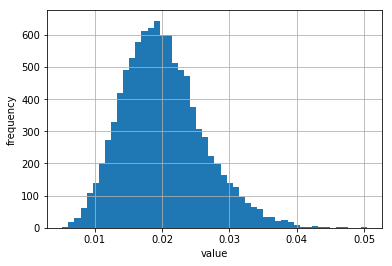

In [4]:
x1 = srd_euler()
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

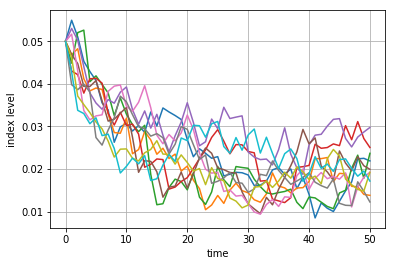

In [5]:
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

### the exact mean reversion model ###
<img src='Mean_reversion_exact_df.png'>
<img src='Mean_reversion_exact.png'>

In [6]:
def srd_exact():
    x2 = np.zeros((M + 1, I))
    x2[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x2[t - 1]
        x2[t] = c * np.random.noncentral_chisquare(df, nc, size=I)

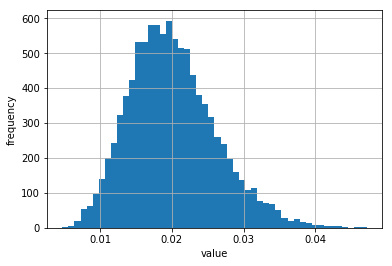

In [7]:
x2 = srd_euler()
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

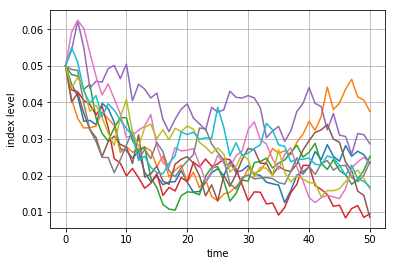

In [8]:
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

In [9]:
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.005          0.005
           max          0.050          0.047
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.000          0.000
      kurtosis          0.555          0.545
